# 1) Project Objectives

In this project, I am part of the market research team and I will be analyzing whether there are differences across the product line with respect to customer characteristics

To answer the main question on the differences across product line, I have split the the analyses to two different sub-questions using two different dashboards to answer them.

1) To find out how the mean income, marital status, and education of customers affects the products they purchase. How the branch location of the store affects this and what can be done to push for more sales or profit. <br>
2) To find out how the fitness - self-rated fitness level, intended usage of treadmill, and the number of times used - affects the products they purchase. How gender might affect this and what can be done to push for more sales or profit.


# 2) Data Preparation

In this section, we will be going through the dataset to do some simple cleaning

In [1]:
#First import all the libraries required

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading the CSV file

df = pd.read_csv('cardio_good_fitness.csv')
df.head()

,Product,Branch,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,West,18,Male,14,Single,NaN,4,29562,112
1,TM195,East,19,Male,15,Single,2,3,31836,75
2,TM195,West,19,Female,14,P,4,3,30699,66
3,TM195,South,na,na,na,na,na,na,na,na
4,TM195,West,19,Male,12,S,NaN,3,32973,85


In [3]:
#Checking for null counts and data types of the variables

df.info()

#From here, we notice that there are 3 missing values in age column and 8 missing values in usage column so we'll
#be investigating them later.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        183 non-null    object
 1   Branch         183 non-null    object
 2   Age            180 non-null    object
 3   Gender         183 non-null    object
 4   Education      183 non-null    object
 5   MaritalStatus  183 non-null    object
 6   Usage          175 non-null    object
 7   Fitness        183 non-null    object
 8   Income         183 non-null    object
 9   Miles          183 non-null    object
dtypes: object(10)
memory usage: 14.4+ KB


In [4]:
#As I noted that there are 'na' in the data, I have replaced them all with np.nan

df = df.replace('na',np.nan)


In [5]:
#Re-checking of null counts

df.info()

#This time, we notice that only product and branch do not have null values.
#Hence, we will attempt to fill the rest of the variables in.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        183 non-null    object
 1   Branch         183 non-null    object
 2   Age            174 non-null    object
 3   Gender         180 non-null    object
 4   Education      180 non-null    object
 5   MaritalStatus  180 non-null    object
 6   Usage          172 non-null    object
 7   Fitness        180 non-null    object
 8   Income         180 non-null    object
 9   Miles          180 non-null    object
dtypes: object(10)
memory usage: 14.4+ KB


In [6]:
#Checking each column for their values and changing each column to correct data type and filling NaN data if possible

df['Product'].value_counts()

#No issues

TM195    81
TM498    61
TM798    41
Name: Product, dtype: int64

In [7]:
#Checking each column for their values and changing each column to correct data type and filling NaN data if possible

df['Branch'].value_counts()

#No issues

South    50
West     48
East     45
North    40
Name: Branch, dtype: int64

In [8]:
#Checking each column for their values and changing each column to correct data type and filling NaN data if possible

df['Age'].value_counts()
tempdf = df['Age'].dropna()
mean_age = round(tempdf.astype(int).mean())

#Filling up all NA age with mean age
df['Age'] = df['Age'].fillna(mean_age)

#Change datatype
df['Age'] = df['Age'].astype(int)

In [9]:
#Checking each column for their values and changing each column to correct data type and filling NaN data if possible

df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [10]:
#Checking each column for their values and changing each column to correct data type and filling NaN data if possible

df['Education'].value_counts()
tempdf = df['Education'].dropna()
mean_education = round(tempdf.astype(int).mean())

#Filling up all NA age with mean education
df['Education'] = df['Education'].fillna(mean_education)

#Change datatype
df['Education'] = df['Education'].astype(int)

df['Education'].value_counts()

16    88
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [11]:
#Checking each column for their values and changing each column to correct data type and filling NaN data if possible

df['MaritalStatus'].value_counts()

#Change all to same description

df['MaritalStatus'] = df['MaritalStatus'].replace('P','Partnered')
df['MaritalStatus'] = df['MaritalStatus'].replace('S','Single')

df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [12]:
#Checking each column for their values and changing each column to correct data type and filling NaN data if possible

df['Usage'].value_counts()
tempdf = df['Usage'].dropna()
mean_usage = round(tempdf.astype(int).mean())

#Filling up all NA age with mean education
df['Usage'] = df['Usage'].fillna(mean_usage)

#Change datatype
df['Usage'] = df['Usage'].astype(int)

df['Usage'].value_counts()

3    72
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [13]:
#Checking each column for their values and changing each column to correct data type and filling NaN data if possible

df['Fitness'].value_counts()
tempdf = df['Fitness'].dropna()
mean_fitness = round(tempdf.astype(int).mean())

#Filling up all NA age with mean education
df['Fitness'] = df['Fitness'].fillna(mean_fitness)

#Change datatype
df['Fitness'] = df['Fitness'].astype(int)

df['Fitness'].value_counts()

3    100
5     31
2     26
4     24
1      2
Name: Fitness, dtype: int64

In [14]:
#Checking each column for their values and changing each column to correct data type and filling NaN data if possible

df['Income'].value_counts()
tempdf = df['Income'].dropna()
mean_income = round(tempdf.astype(int).mean())

#Filling up all NA age with mean education
df['Income'] = df['Income'].fillna(mean_income)

#Change datatype
df['Income'] = df['Income'].astype(int)

df['Income'].value_counts()

45480    14
52302     9
53439     8
46617     8
54576     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: Income, Length: 63, dtype: int64

In [15]:
#Checking each column for their values and changing each column to correct data type and filling NaN data if possible

df['Miles'].value_counts()
tempdf = df['Miles'].dropna()
mean_miles = round(tempdf.astype(int).mean())

#Filling up all NA age with mean education
df['Miles'] = df['Miles'].fillna(mean_miles)

#Change datatype
df['Miles'] = df['Miles'].astype(int)

df['Miles'].value_counts()

85     27
95     12
66     10
75     10
106     9
47      9
94      8
113     8
53      7
100     7
103     6
200     6
56      6
64      6
180     6
127     5
160     5
42      4
150     4
74      3
170     3
120     3
38      3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64

In [16]:
#Double check final df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        183 non-null    object
 1   Branch         183 non-null    object
 2   Age            183 non-null    int32 
 3   Gender         180 non-null    object
 4   Education      183 non-null    int32 
 5   MaritalStatus  180 non-null    object
 6   Usage          183 non-null    int32 
 7   Fitness        183 non-null    int32 
 8   Income         183 non-null    int32 
 9   Miles          183 non-null    int32 
dtypes: int32(6), object(4)
memory usage: 10.1+ KB


# 3) Visualizations

Now that the data is clean, we will be doing exploratory analysis and visualizations based on the different characteristics variables that are given.

Visualizations are then combined and used in dashboards for presentation

In [17]:
#To see general trends

df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,28.792350,15.579235,3.448087,3.306011,53719.584699,103.191257
std,6.886086,1.604597,1.077382,0.951758,16370.074836,51.434387
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44343.000000,70.000000
50%,27.000000,16.000000,3.000000,3.000000,51165.000000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58251.500000,113.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [18]:
#To see general trends

df.corr()

#Generally higher income correlates with higher education, usage, fitness, miles

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280464,0.014832,0.060889,0.513410,0.036615
Education,0.280464,1.000000,0.392527,0.408576,0.625467,0.307091
Usage,0.014832,0.392527,1.000000,0.669298,0.518783,0.758055
Fitness,0.060889,0.408576,0.669298,1.000000,0.534542,0.785041
Income,0.513410,0.625467,0.518783,0.534542,1.000000,0.543473
Miles,0.036615,0.307091,0.758055,0.785041,0.543473,1.000000


In [19]:
#To see general trends for the 3 different types of model

display(df[df['Product'] == 'TM195'].corr())
display(df[df['Product'] == 'TM195'].describe())

display(df[df['Product'] == 'TM498'].corr())
display(df[df['Product'] == 'TM498'].describe())

display(df[df['Product'] == 'TM798'].corr())
display(df[df['Product'] == 'TM798'].describe())


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.335566,-0.015428,0.054510,0.749414,-0.063890
Education,0.335566,1.000000,0.167595,0.111499,0.450921,0.118057
Usage,-0.015428,0.167595,1.000000,0.468701,-0.053133,0.642582
Fitness,0.054510,0.111499,0.468701,1.000000,0.006448,0.824134
Income,0.749414,0.450921,-0.053133,0.006448,1.000000,-0.032108
Miles,-0.063890,0.118057,0.642582,0.824134,-0.032108,1.000000


,Age,Education,Usage,Fitness,Income,Miles
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,28.555556,15.049383,3.086420,2.962963,46508.172840,83.037037
std,7.176350,1.213479,0.777778,0.660387,9055.300921,28.780829
min,18.000000,12.000000,2.000000,1.000000,29562.000000,38.000000
25%,23.000000,14.000000,3.000000,3.000000,38658.000000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,46617.000000,85.000000
75%,33.000000,16.000000,4.000000,3.000000,53439.000000,94.000000
max,50.000000,18.000000,5.000000,5.000000,68220.000000,188.000000


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.471091,-0.078474,-0.026684,0.785718,-0.124384
Education,0.471091,1.000000,-0.112614,-0.092327,0.543089,-0.233423
Usage,-0.078474,-0.112614,1.000000,0.349681,0.072419,0.671831
Fitness,-0.026684,-0.092327,0.349681,1.000000,-0.006616,0.676794
Income,0.785718,0.543089,0.072419,-0.006616,1.000000,-0.050337
Miles,-0.124384,-0.233423,0.671831,0.676794,-0.050337,1.000000


,Age,Education,Usage,Fitness,Income,Miles
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,28.901639,15.131148,3.065574,2.901639,49051.459016,88.180328
std,6.589651,1.217585,0.793071,0.624631,8603.060441,33.041140
min,19.000000,12.000000,2.000000,1.000000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,45480.000000,64.000000
50%,26.000000,16.000000,3.000000,3.000000,50028.000000,85.000000
75%,33.000000,16.000000,3.000000,3.000000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.000000,67083.000000,212.000000


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.166551,0.115702,0.198786,0.701915,0.240112
Education,0.166551,1.000000,0.019159,-0.109006,0.269213,-0.202555
Usage,0.115702,0.019159,1.000000,0.306293,0.317276,0.522830
Fitness,0.198786,-0.109006,0.306293,1.000000,0.166984,0.419526
Income,0.701915,0.269213,0.317276,0.166984,1.000000,0.330164
Miles,0.240112,-0.202555,0.522830,0.419526,0.330164,1.000000


,Age,Education,Usage,Fitness,Income,Miles
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,29.097561,17.292683,4.731707,4.585366,74911.780488,165.341463
std,6.884057,1.631623,0.975305,0.706244,18585.271430,60.144663
min,22.000000,14.000000,3.000000,3.000000,48556.000000,80.000000
25%,25.000000,16.000000,4.000000,4.000000,57271.000000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,75946.000000,160.000000
75%,30.000000,18.000000,5.000000,5.000000,90886.000000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


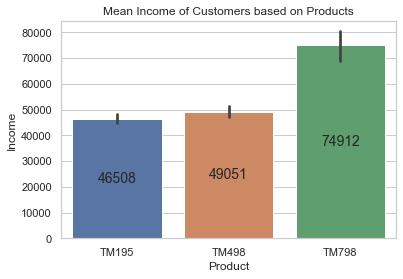

In [20]:
#To check how income differs for customer of different product

sns.set_theme(style="whitegrid")
ax1 = sns.barplot(x = 'Product',y = 'Income', data=df)
ax1.set_title("Mean Income of Customers based on Products")
for container in ax1.containers:
    ax1.bar_label(container,size=14,label_type = 'center',fmt='%.0f') 
    
#Barplot was used as the product variable is a categorical variable and it is easy to see the difference from the mean.
#TM798 mean much higher than the other two

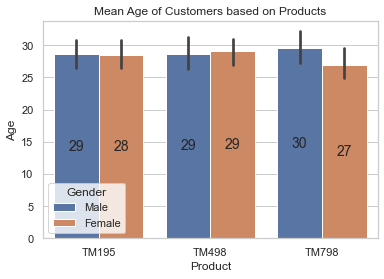

In [21]:
#To check how age differs for customer of different product by gender

ax2 = sns.barplot(x = 'Product',y = 'Age',hue = 'Gender', data=df)
ax2.set_title("Mean Age of Customers based on Products")
for container in ax2.containers:
    ax2.bar_label(container,size=14,label_type = 'center',fmt='%.0f')
    
#Bar chart used to see the exact mean age.
#Relatively similar numbers across all products.

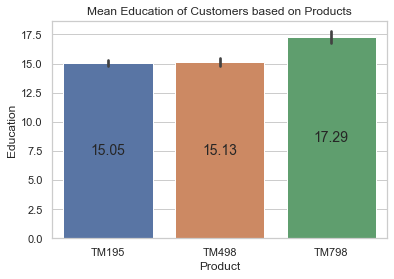

In [22]:
#To check how education differs for customer of different product

ax3 = sns.barplot(x = 'Product',y = 'Education', data=df)
ax3.set_title("Mean Education of Customers based on Products")
for container in ax3.containers:
    ax3.bar_label(container,size=14,label_type = 'center',fmt='%.2f')
    
#Bar chart to help see the exact mean difference. 
#TM798 has longer number of years of education for customers.

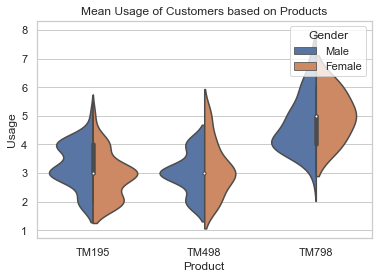

In [23]:
#To check how usage differs for customer of different product by gender

ax4 = sns.violinplot(x = 'Product',y = 'Usage',hue = 'Gender',split=True, data=df)
ax4.set_title("Mean Usage of Customers based on Products")

for container in ax4.containers:
    ax4.bar_label(container,size=14,label_type = 'center',fmt='%.2f')
    
#Violin plot to see the distribution.
#TM798 has higher median usage customers.

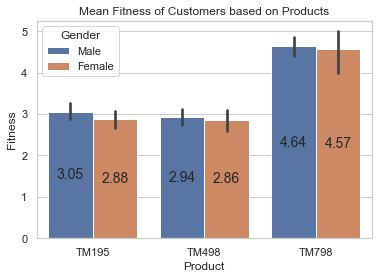

In [24]:
#To check how fitness differs for customer of different product

ax5 = sns.barplot(x = 'Product',y = 'Fitness',hue = "Gender", data=df)
ax5.set_title("Mean Fitness of Customers based on Products")
for container in ax5.containers:
    ax5.bar_label(container,size=14,label_type = 'center',fmt='%.2f')
    
#Bar plot to see mean diff clearly. Distribution very similar across.
#TM798 has higher mean fitness rating customers.

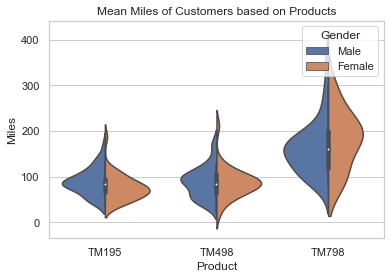

In [25]:
#To check how miles differs for customer of different product

ax6 = sns.violinplot(x = 'Product',y = 'Miles', hue = 'Gender',split = True, data=df)
ax6.set_title("Mean Miles of Customers based on Products")
for container in ax6.containers:
    ax6.bar_label(container,size=14,label_type = 'center',fmt='%.2f')
    
#Violinplot to see the distribution
#TM798 has customer with higher median miles.

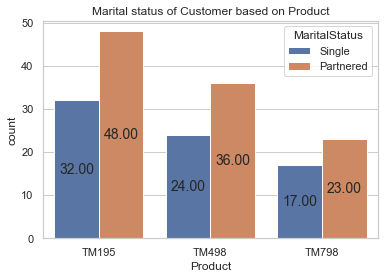

In [26]:
#To check how marital status differs for customer of different product

ax7 = sns.countplot(x = 'Product',hue = 'MaritalStatus', data=df)
ax7.set_title("Marital status of Customer based on Product")
for container in ax7.containers:
    ax7.bar_label(container,size=14,label_type = 'center',fmt='%.2f')
    
#Bar chart to see mean and actual difference in proportion.
#Difference is smaller in TM798 compared to TM498, compared to TM195
#TM195 has largest difference between single and partnerd in terms of qunatity sold.

Text(0.5, 1.0, 'Relationship of Income and Education of Customers')

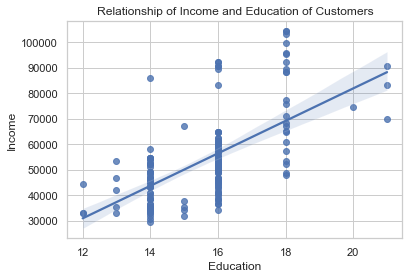

In [27]:
#To check how education differ with income

ax8 = sns.regplot(x = 'Education', y = "Income", data = df)
ax8.set_title("Relationship of Income and Education of Customers")

#Regression plot to see the correlation well
#Higher the income, longer the number of years of education of customers.

Text(0.5, 1.0, 'Relationship of Income and Marital Status of Customers')

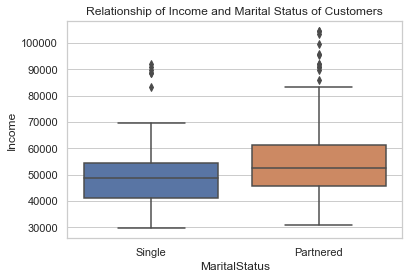

In [28]:
#To check how income differs with marital status

ax9 = sns.boxplot(x = 'MaritalStatus', y = "Income", data = df)
ax9.set_title("Relationship of Income and Marital Status of Customers")

#Box plot to see the difference in median and spread
#Partnered has higher income individuals

Text(0.5, 1.0, 'Relationship of Income of Customers and Branch')

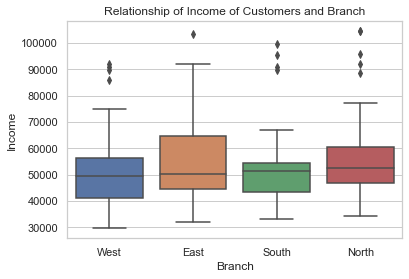

In [29]:
#To check how income differs with differing branches

ax10 = sns.boxplot(x = 'Branch', y = "Income", data = df)
ax10.set_title("Relationship of Income of Customers and Branch")

#Box plot to see the difference in median and spread. 
#Although median income is relatively similar across, East and North branch has more customer with higher income

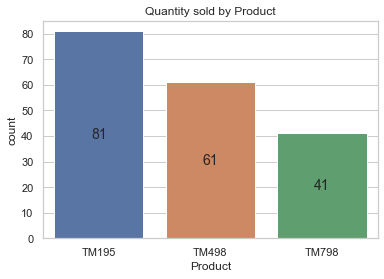

In [30]:
#To check how qty sold differs for customer of different brand

ax11 = sns.countplot(x = 'Product', data=df)
ax11.set_title("Quantity sold by Product")
for container in ax11.containers:
    ax11.bar_label(container,size=14,label_type = 'center',fmt='%.0f')
    
#Bar chart to see exact count.
#Most quantity sold for TM195, least for TM798

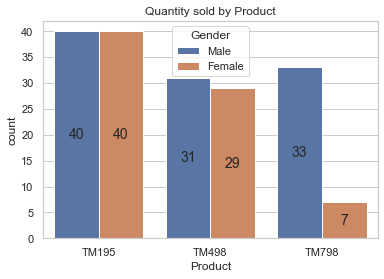

In [31]:
#To check how qty sold differs for customer of different brand by gender

ax12 = sns.countplot(x = 'Product',hue = 'Gender', data=df)
ax12.set_title("Quantity sold by Product")
for container in ax12.containers:
    ax12.bar_label(container,size=14,label_type = 'center',fmt='%.0f')
    
#Bar chart to see exact count.
#Only 7 TM798 sold to females. A little peculiar.

Text(0.5, 1.0, 'Relationship of Income and Gender of Customers by Product')

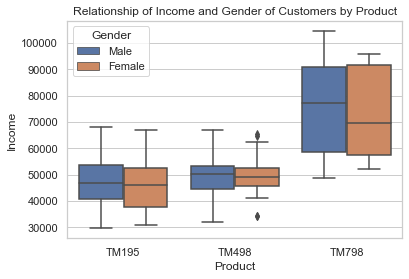

In [32]:
#To check how income differs with differing gender and product - Investigating TM798 low number of female

ax13 = sns.boxplot(x = 'Product', y = "Income",hue = "Gender", data = df)
ax13.set_title("Relationship of Income and Gender of Customers by Product")

#Box plot to see the difference in median and spread. 
#TM798 has higher income customers, no gender differences.

C:\Users\jianx\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship of Income and Gender of Customers by Branch')

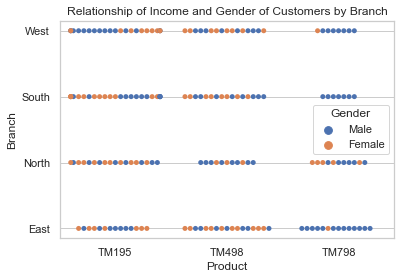

In [33]:
#To check how income differs with differing gender - Investigating TM798 low number of female

ax14 = sns.swarmplot(x = 'Product', y = "Branch",hue = "Gender", data = df)
ax14.set_title("Relationship of Income and Gender of Customers by Branch")

#Swarmplot to see the distribution pattern.
#North location branch has slightly more females that bought TM798 when compared to other branches.

C:\Users\jianx\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jianx\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jianx\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship of Income and Marital Status of Customers by Gender')

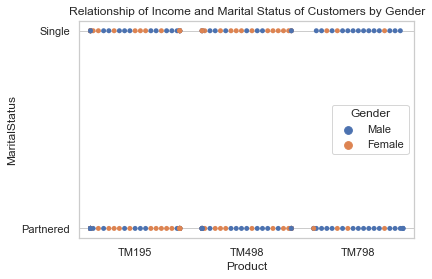

In [34]:
#To check how income differs with differing gender - Investigating TM798 low number of female

ax15 = sns.swarmplot(x = 'Product', y = "MaritalStatus",hue = "Gender", data = df)
ax15.set_title("Relationship of Income and Marital Status of Customers by Gender")

#Swarm plot to see the distribution pattern.
#No huge difference in TM798 in terms of distribution.

# 4) Dashboards

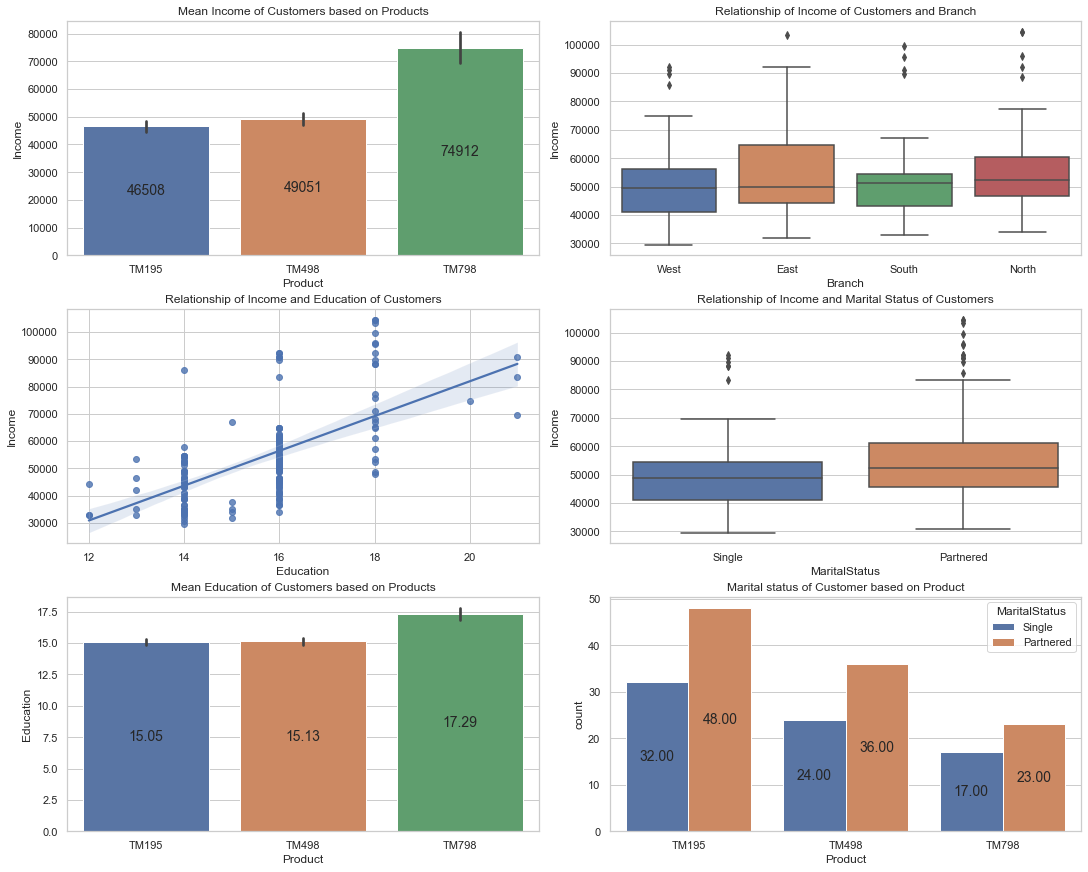

In [35]:
#Dashboard for analysis of income, education, marital status, and branch

fig, ax = plt.subplots(3,2, figsize=(15,12), constrained_layout=True)

ax1 = sns.barplot(x = 'Product',y = 'Income', data=df, ax = ax[0,0])
ax1.set_title("Mean Income of Customers based on Products")
for container in ax1.containers:
    ax1.bar_label(container,size=14,label_type = 'center',fmt='%.0f') 
    
ax9 = sns.boxplot(x = 'Branch', y = "Income", data = df, ax=ax[0,1])
ax9.set_title("Relationship of Income of Customers and Branch")

ax8 = sns.regplot(x = 'Education', y = "Income", data = df, ax=ax[1,0])
ax8.set_title("Relationship of Income and Education of Customers")

ax9 = sns.boxplot(x = 'MaritalStatus', y = "Income", data = df, ax=ax[1,1])
ax9.set_title("Relationship of Income and Marital Status of Customers")

ax3 = sns.barplot(x = 'Product',y = 'Education', data=df, ax=ax[2,0])
ax3.set_title("Mean Education of Customers based on Products")
for container in ax3.containers:
    ax3.bar_label(container,size=14,label_type = 'center',fmt='%.2f')

ax7 = sns.countplot(x = 'Product',hue = 'MaritalStatus', data=df, ax=ax[2,1])
ax7.set_title("Marital status of Customer based on Product")
for container in ax7.containers:
    ax7.bar_label(container,size=14,label_type = 'center',fmt='%.2f')

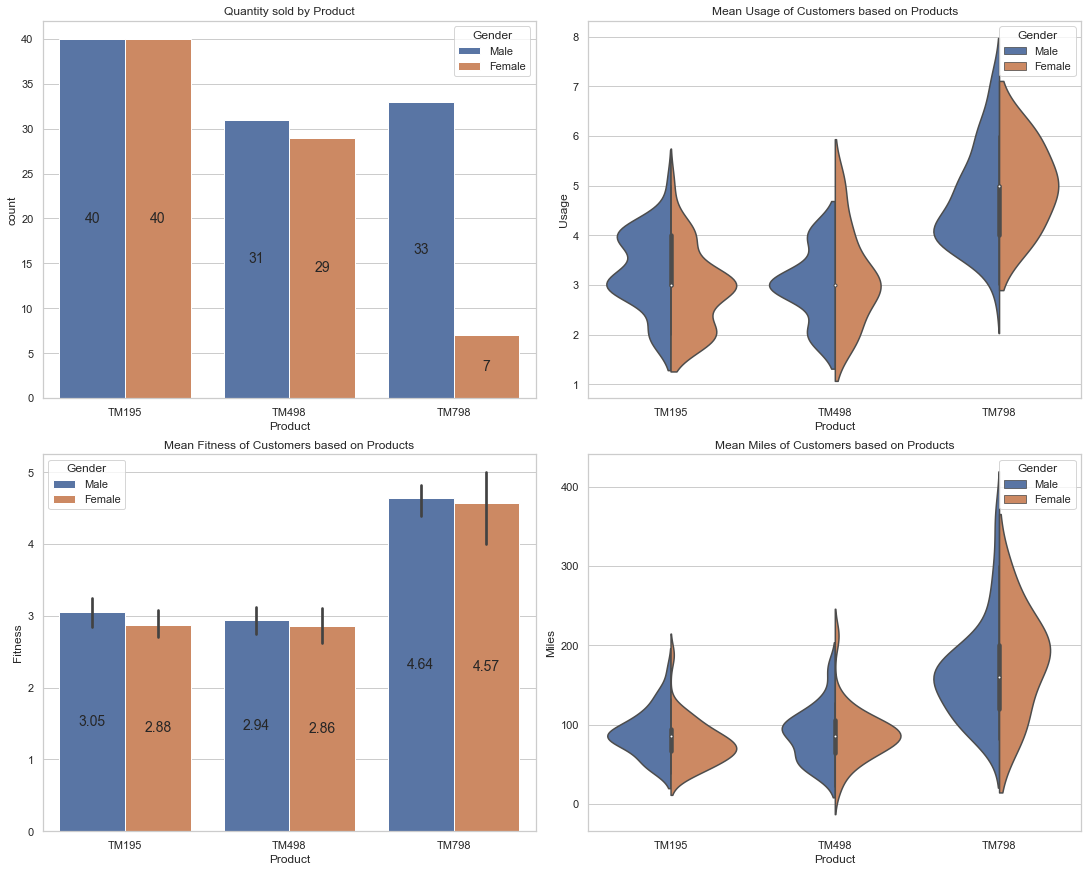

In [36]:
#Dashboard for analysis of fitness - Usage, fitness, miles -  and gender

fig, ax = plt.subplots(2,2, figsize=(15,12), constrained_layout=True)

ax11 = sns.countplot(x = 'Product',hue = 'Gender', data=df, ax = ax[0,0])
ax11.set_title("Quantity sold by Product")
for container in ax11.containers:
    ax11.bar_label(container,size=14,label_type = 'center',fmt='%.0f')

ax4 = sns.violinplot(x = 'Product',y = 'Usage',hue = 'Gender', data=df,split= True, ax = ax[0,1])
ax4.set_title("Mean Usage of Customers based on Products")

ax5 = sns.barplot(x = 'Product',y = 'Fitness',hue = "Gender", data=df, ax = ax[1,0])
ax5.set_title("Mean Fitness of Customers based on Products")
for container in ax5.containers:
    ax5.bar_label(container,size=14,label_type = 'center',fmt='%.2f')

ax6 = sns.violinplot(x = 'Product',y = 'Miles', hue = 'Gender',split = True, data=df, ax = ax[1,1])
ax6.set_title("Mean Miles of Customers based on Products")
for container in ax6.containers:
    ax6.bar_label(container,size=14,label_type = 'center',fmt='%.2f')
